In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/biomechanical-features-of-orthopedic-patients")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'biomechanical-features-of-orthopedic-patients' dataset.
Path to dataset files: /kaggle/input/biomechanical-features-of-orthopedic-patients


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
from subprocess import check_output

In [3]:
# csv파일을 불러와 data에 저장하기
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [4]:
# feature들과 해당 값 확인
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
# NAN 값 없음 / 310 개의 data 존재 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


* 310개의 data 존재
* feature들의 type : float64
* 타겟 data : string(class)
  * pelvic_incidence  : 골반 발생률
  * pelvic_tilt numeric : 골반 기울기
  * lumbar_lordosis_angle : 요추 전만각
  * sacral_slope : 천골 경사면
  * pelvic_radius : 골반 요골
  * degree_spondylolisthesis : 척추전위증 등급

In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


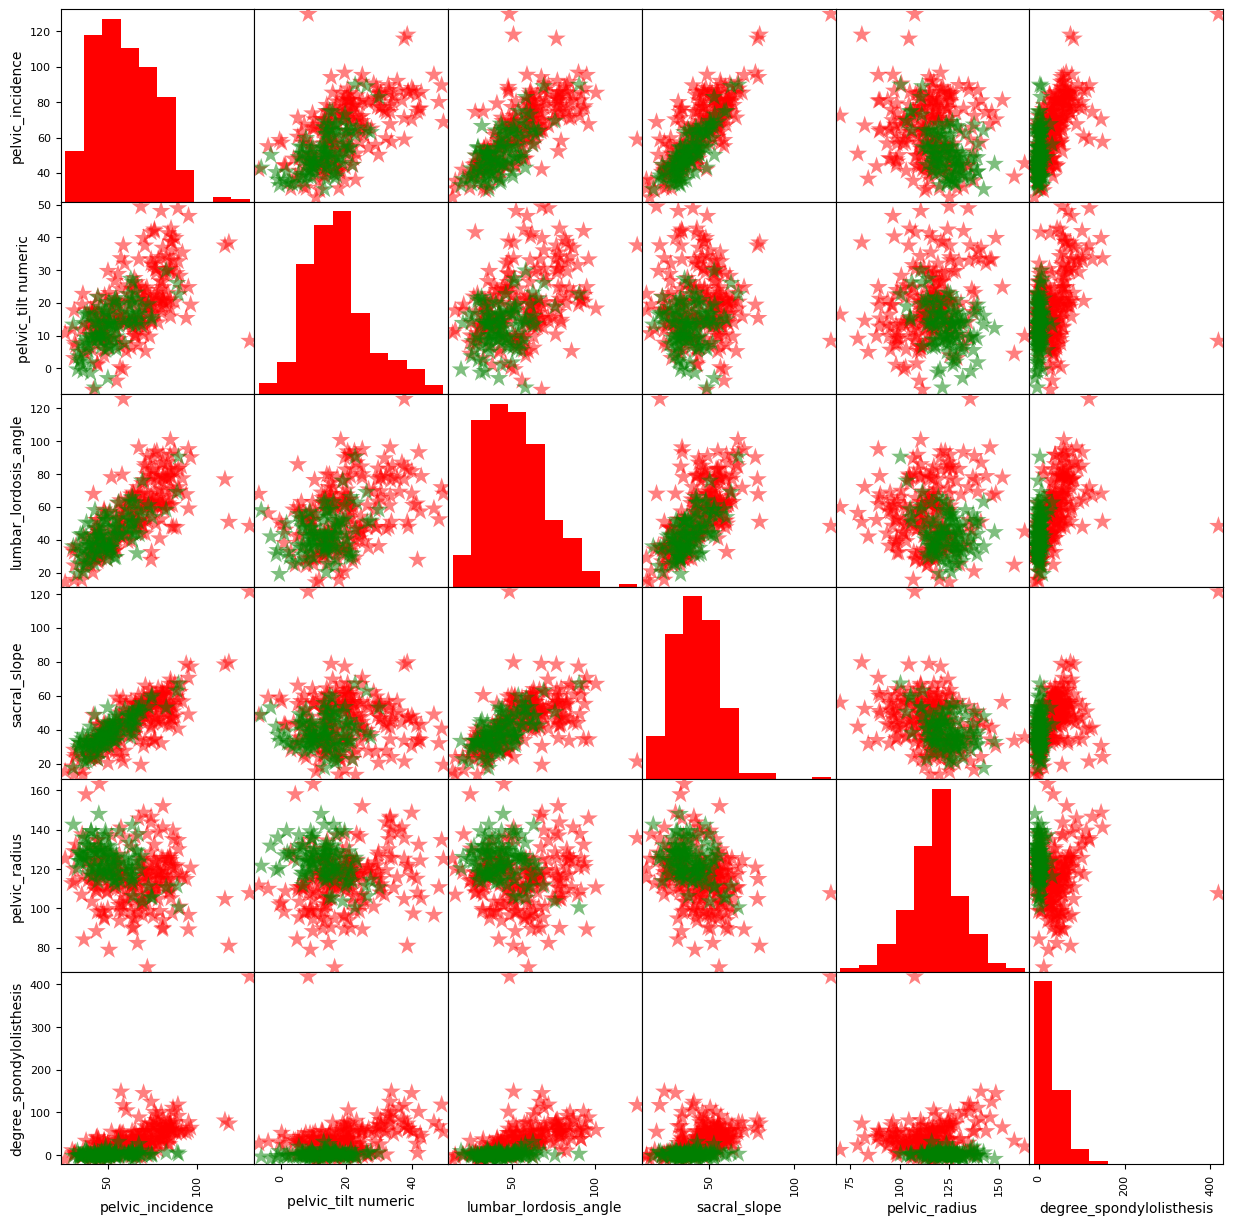

In [7]:
# 비정상인 경우 빨간색, 정상인 경우 녹색으로 표시
# c : color, alpha : 불투명도
color_list = ["red" if i == "Abnormal" else "green" for i in data.loc[:, "class"]]
pd.plotting.scatter_matrix(data.loc[:, data.columns != "class"],
                                        c = color_list,
                                        figsize = [15,15],
                                        diagonal = "hist",
                                        alpha = 0.5,
                                        s = 200,
                                        marker = "*",
                                        hist_kwds={"color": "red"})
plt.show()

,count
class,
Abnormal,210
Normal,100


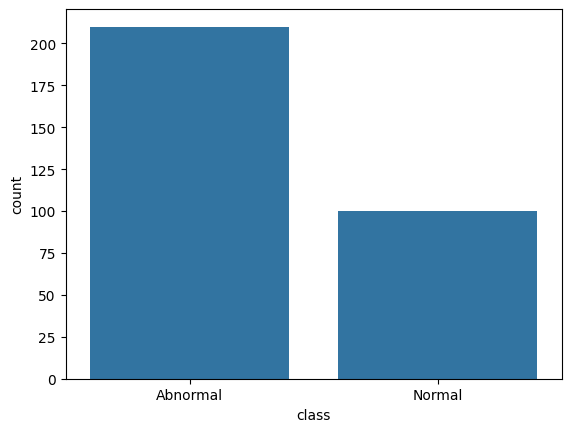

In [8]:
# 정상인 데이터와 비정상인 데이터의 개수
sns.countplot(x = "class", data = data)
data.loc[:, "class"].value_counts()

# KNN
kNN은 주변의 가장 가까운 K개의 데이터의 클래스 정보를 이용해 예측을 수행하는 거리 기반 분류 알고리즘이다.
모델 구조가 단순해 데이터 분포를 직관적으로 이해하기에 적합하다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:, data.columns != "class"], data.loc[:, "class"]
knn.fit(x,y)
prediction = knn.predict(x)
print("예측: {}".format(prediction))

예측: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 

학습에 사용한 데이터로 다시 예측하면 성능이 과대 평가될 수 있으므로, 데이터를 학습용과 테스트용으로 분리하였다. 훈련 데이터로 모델을 학습하고, 테스트 데이터에 대한 정확도를 기준으로 성능을 평가하였다.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:, data.columns != "class"], data.loc[:, "class"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("KNN (k=3)일때의 정확도 : ", knn.score(x_test, y_test))

KNN (k=3)일때의 정확도 :  0.8602150537634409


현재 k = 3으로 했을경우 정확도 약 86%가 나온다.
k의 값이 너무 작을 시 과적합, k의 값이 너무 클 시 과소적합을 유발할 수 있어, 다양한 k의 값에 대해 성능을 비교하여 최적의 k를 선택

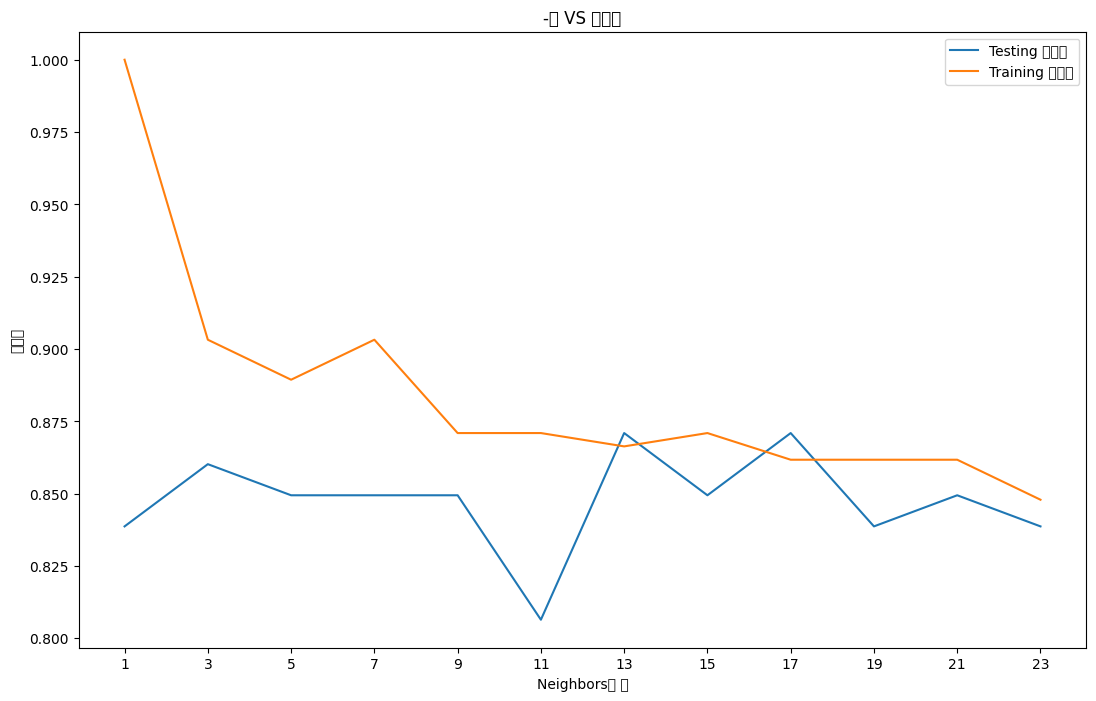

K = 1일때의 정확도 0.8387096774193549
K = 3일때의 정확도 0.8602150537634409
K = 5일때의 정확도 0.8494623655913979
K = 7일때의 정확도 0.8494623655913979
K = 9일때의 정확도 0.8494623655913979
K = 11일때의 정확도 0.8064516129032258
K = 13일때의 정확도 0.8709677419354839
K = 15일때의 정확도 0.8494623655913979
K = 17일때의 정확도 0.8709677419354839
K = 19일때의 정확도 0.8387096774193549
K = 21일때의 정확도 0.8494623655913979
K = 23일때의 정확도 0.8387096774193549
K = 13일때 정확도 0.8709677419354839로 가장 높다


In [11]:
neig = np.arange(1, 25,2)
train_accuracy = []
test_accuracy = []
# k값이 다를 때의 정확도를 측정하기 위한 loop
for i, k in enumerate(neig):
    # k가 1부터 25까지 홀수로 증가
    knn = KNeighborsClassifier(n_neighbors=k)
    # knn알고리즘에 적용
    knn.fit(x_train,y_train)
    # train 정확도
    train_accuracy.append(knn.score(x_train, y_train))
    # test 정확도
    test_accuracy.append(knn.score(x_test, y_test))

# 시각화
plt.figure(figsize = [13,8])
plt.plot(neig, test_accuracy, label = "Testing 정확도")
plt.plot(neig, train_accuracy, label = "Training 정확도")
plt.legend()
plt.title("-값 VS 정확도")
plt.xlabel("Neighbors의 수")
plt.ylabel("정확도")
plt.xticks(neig)
plt.savefig("graph.png")
plt.show()
count = 0
for i in test_accuracy:
    print("K = {}일때의 정확도 {}".format(1+2*count, i))
    count+=1
print("K = {}일때 정확도 {}로 가장 높다".format(1+2*test_accuracy.index(np.max(test_accuracy)),np.max(test_accuracy)))

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(23))

In [13]:
from sklearn.metrics import classification_report

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.92      0.85      0.88        66
      Normal       0.69      0.81      0.75        27

    accuracy                           0.84        93
   macro avg       0.80      0.83      0.81        93
weighted avg       0.85      0.84      0.84        93



동일한 데이터셋에 대해 KNN과 Decision Tree, Random Forest를 적용하여 성능을 비교하였다.
거리 기반 모델(KNN)과 트리 기반 모델 간의 성능 차이를 통해 데이터 특성과 모델 적합성의 관계를 살펴보았다.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(f"{name}: {acc:.3f}")


KNN (k=3): 0.860
Decision Tree: 0.785
Random Forest: 0.860


모델의 일반화 성능을 보다 안정적으로 평가하기 위해,
K-Fold 알고리즘을 사용한 교차검증을 수행하였다.

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=3),
    x, y,
    cv=5,
    scoring="accuracy"
)

count = 0
for i in scores:
    print("교차 검증 {} 정확도 : {}".format(count, i))
    count+=1

print(scores.mean(), scores.std())


교차 검증 0 정확도 : 0.46774193548387094
교차 검증 1 정확도 : 0.7903225806451613
교차 검증 2 정확도 : 0.8870967741935484
교차 검증 3 정확도 : 0.9516129032258065
교차 검증 4 정확도 : 0.8870967741935484
0.7967741935483871 0.17239211891467598
